## Benford's law on Numerai Dataset

It has been shown that Benford's law can apply to day-to-day probability distributions for markets [1]. It is possible the Numerai's dataset would also demonstrate the law.

>Encryption is a way to secure data. Ordinarily, if you encrypt data, it becomes useless to a data scientist. But new developments in cryptography are letting us share datasets securely without destroying their utility to data scientists.

>Structure-preserving encryption schemes allow machine learning algorithms to learn things even though blind to the raw data.
There are now practical homomorphic encryption schemes, such as the Fan and Vercauteren scheme, which allows one to perform addition and multiplication operations on high degree polynomial ciphertexts in an algebraic ring. Turns out, if multiplication and addition are preserved, then structure is too. Since machine learning algorithms only care about structure, this breakthrough means you can run machine learning algorithms on encrypted data.

>Simpler schemes like order-preserving symmetric encryption also allow strong security in certain settings, and are easy to use with out of the box machine learning tools.[2]

1. Marco Corazza (3), Andrea Ellero (3), and Alberto Zorzi (3). "Checking Financial Markets via Benford's Law: The S&P 500 Case." - Springer. N.p., n.d. Web. 27 Sept. 2016.
2. https://medium.com/numerai/encrypted-data-for-efficient-markets-fffbe9743ba8#.4iiwc6ima

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') #plot style used by fivethirtyeight
plt.rcParams['figure.figsize'] = (12.0, 7.0)

In [93]:
#Import Data
df=pd.read_csv('./numerai_training_data.csv')
df_test=pd.read_csv('./numerai_tournament_data.csv')

In [7]:
#Generate Truth for First Digits
def pbenford_law(d):
    return np.log10(1+1/d)

digits = [x for x in range(1,10)]
p_digits = [pbenford_law(x) for x in range(1,10)]

In [89]:
#Generate Numerai First Digits
def first_decimal_as_int(d):
    try:
        return int(str(d-int(d))[2:3])
    except:
        return -1

df_digits = pd.DataFrame()
df_cols = list(df.columns)
df_cols.remove('target')
for col in df_cols:
    df_digits[col] = df[col].apply(first_decimal_as_int)

df_p = [df_digits[df_digits == x].count()/len(df_digits[df_digits != -1]) for x in range(1,10)]


In [48]:
df_p_all_features = pd.DataFrame()
for i in range(0,len(df_p)):
    for feature in df_cols:
        df_p_all_features.loc[i+1,feature] = df_p[i][feature]

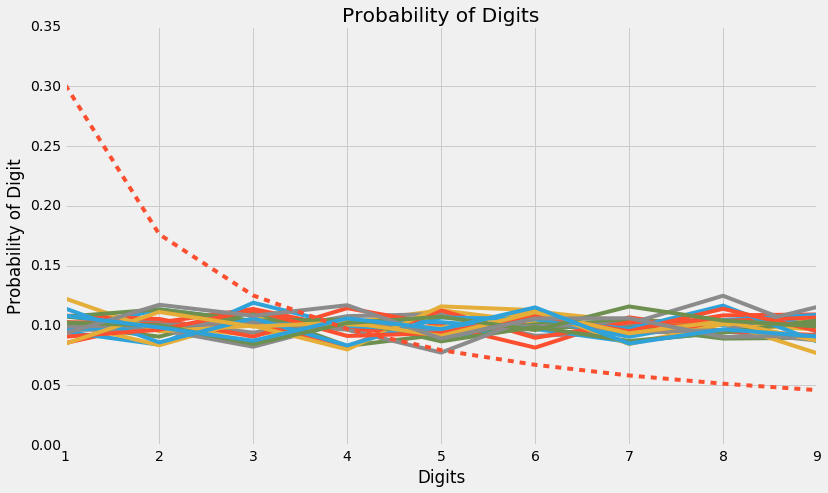

In [74]:
ax =  df_p_all_features.plot(legend=False)
ax.set_xlabel("Digits")
ax.set_ylabel("Probability of Digit")
pd.DataFrame(p_digits, index=digits).plot(ax=ax, legend=False, style='--', title='Probability of Digits')

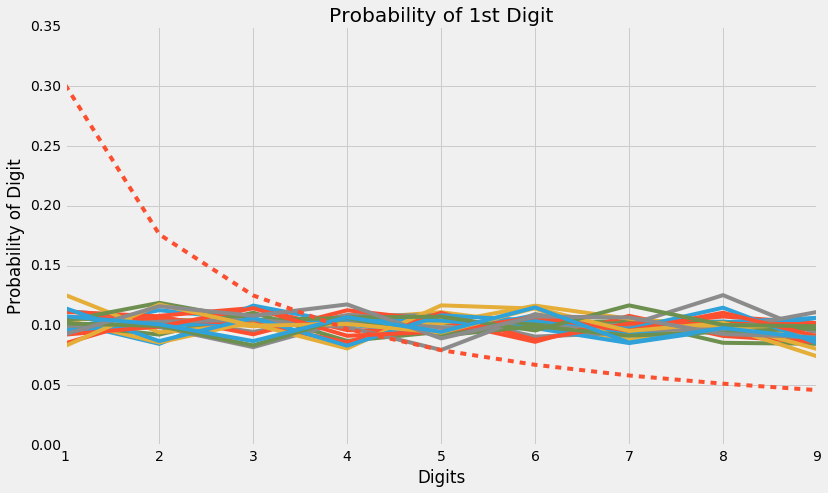

In [94]:
#The Test Data Set


#Take a look where all the labels are 1, ie. true. 
df_true = df_test
df_digits = pd.DataFrame()
df_cols = list(df.columns)
df_cols.remove('target')
for col in df_cols:
    df_digits[col] = df_true[col].apply(first_decimal_as_int)

df_p = [df_digits[df_digits == x].count()/len(df_digits[df_digits != -1]) for x in range(1,10)]

df_p_all_features = pd.DataFrame()
for i in range(0,len(df_p)):
    for feature in df_cols:
        df_p_all_features.loc[i+1,feature] = df_p[i][feature]
        
ax =  df_p_all_features.plot(legend=False)
ax.set_xlabel("Digits")
ax.set_ylabel("Probability of Digit")
pd.DataFrame(p_digits, index=digits).plot(ax=ax, legend=False, style='--', title='Probability of 1st Digit')

Dataset appears to be properly dimensionless and without artificats of repeating digits from encryption.